## Imports Used

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import confusion_matrix
import seaborn as sns

## Loading in the data

In [3]:
train = pd.read_csv('data/train.csv', header=0)
test = pd.read_csv('data/test.csv', header=0)

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Cleaning

Here we combine the train and test datasets before we throw them into our model. Initially we looked to test for survival from pclass, sex, age, sibsp, parch, and fare. Since the data sets contain some missing values, we also chose to drop the rows the contian null values. 

In [5]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
train['Sex'] = train['Sex'].replace({'male':0})
train['Sex'] = train['Sex'].replace({'female':1})

test['Sex'] = test['Sex'].replace({'male':0})
test['Sex'] = test['Sex'].replace({'female':1})

train_new = train[['Survived','Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

train_new.dropna(axis=0, inplace=True)
test.dropna(axis=0, inplace=True)

train_X = train_new.drop(['Survived'], axis = 1).to_numpy()
train_y = train_new['Survived'].to_numpy()

test_X = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].to_numpy()

train_X

C:\Users\Simon\AppData\Local\Temp\ipykernel_11352\3220331083.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_new.dropna(axis=0, inplace=True)


array([[ 3.    ,  0.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 3.    ,  1.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 1.    ,  1.    , 19.    ,  0.    ,  0.    , 30.    ],
       [ 1.    ,  0.    , 26.    ,  0.    ,  0.    , 30.    ],
       [ 3.    ,  0.    , 32.    ,  0.    ,  0.    ,  7.75  ]])

In [7]:
from sklearn.model_selection import train_test_split

#Splits training data into training and validation datasets
X_train, X_val, y_train, y_val = train_test_split(train_X, train_y, test_size=0.2, random_state=0)


In [8]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

clf = LogisticRegressionCV(penalty='l1', solver='liblinear', Cs=30, cv=9, max_iter=1000)
steps = [('scalar', MinMaxScaler()),
         ('log', clf)]
pipe = Pipeline(steps=steps)
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, train_scores, val_scores = learning_curve(pipe, X_train, y_train,
                                                        train_sizes=np.linspace(0.1, 1, 20))

In [9]:
clf.fit(X_train, y_train)

print("Accruacy Score of Training: %.4f" % clf.score(X_train, y_train))
print("Accuracy Score of Validation %.4f" % clf.score(X_val, y_val))

Accruacy Score of Training: 0.7951
Accuracy Score of Validation 0.8392


## Ploting the learning curve

Notes:
-   In first graph before modifying features. A lot of underfitting took place in the plot. This could happen for the following reasons:
-        Model is not complex enough
-        The Model has reached max capacity, meaning that it cannot learn any more the features given. 
-        Features may not be informative enough to capture underlying patterns in the data. 

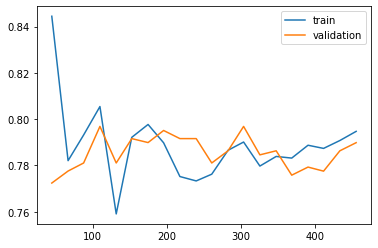

In [10]:
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, val_scores.mean(axis=1), label='validation')
plt.legend()
plt.savefig('graph')

In [11]:
predictions = clf.predict(X_val)

## Confusion Matrix

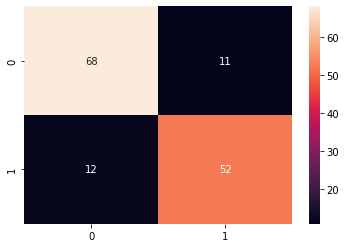

In [12]:
cm=confusion_matrix(y_val, predictions)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax); 

<br> Precision = TP/TP+FP = 68/(68+11) = 0.86
<br> Recal = 68/(68+12) = 0.85
<br> F1 Score = 2/((1/Precision)+(1/Recall)) = 0.85 = 85%

## ROC Curve

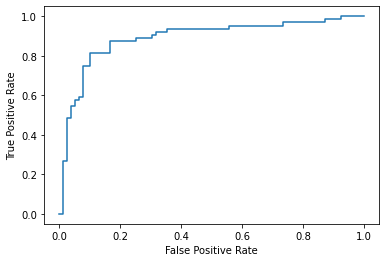

In [14]:
from sklearn import metrics

y_pred_proba = clf.predict_proba(X_val)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_val,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
